<a href="https://colab.research.google.com/github/Narthana11/Assignment/blob/main/Lab4_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os; os.chdir('/content/drive/MyDrive/content')

# New Section

In [ ]:
import torch
from torch import nn
from torch import optim
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
#read train dataset
df_trainds = pd.read_csv('train.csv')
df_trainds.head()

,Unnamed: 0,x,y
0,0,0.771270,2.474538
1,1,0.063558,1.192772
2,2,0.863103,2.912784
3,3,0.025419,1.078507
4,4,0.731994,2.473164


In [ ]:
#Converting dataset to Pytorch tensors
x_train = torch.tensor(df_trainds['x'].values, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(df_trainds['y'].values, dtype=torch.float32)


In [ ]:
df_testds = pd.read_csv('test.csv')
df_testds.head()

,Unnamed: 0,x,y
0,0,0.304614,1.615251
1,1,0.155995,1.347700
2,2,0.662522,2.234106
3,3,0.107891,1.298501
4,4,0.909320,2.893834


In [ ]:
#Converting dataset to tensors
x_test = torch.tensor(df_testds['x'].values, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(df_testds['y'].values, dtype=torch.float32)

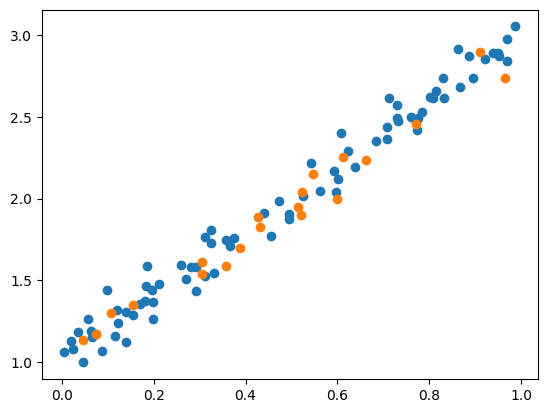

In [ ]:
#creating scatter Plot
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)


In [ ]:
#Building the NN model with 1 input and 1 output featues
model = nn.Linear(1,1)
model

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
#define loss function
loss_fn = nn.MSELoss()

In [ ]:
#define optimization
model.parameters()

<generator object Module.parameters at 0x7971196a34c0>

In [ ]:
for name, param in model.named_parameters():
  print(name, param)
#Setting Up Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.1)



weight Parameter containing:
tensor([[0.7883]], requires_grad=True)
bias Parameter containing:
tensor([-0.6855], requires_grad=True)


In [ ]:
#setting up the training loop
N = 500
#Maintaining loss values for Vizualization
loss_hist = []
for iter in range(N):
  yp = model(x_train)
  #calculating loss
  loss = loss_fn(yp.squeeze(), y_train)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  loss_hist.append(loss.item())

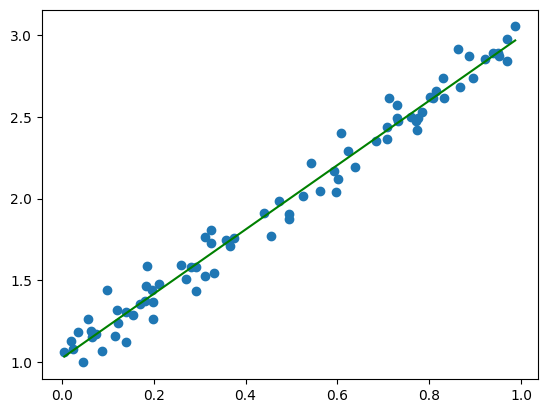

In [ ]:
#visualize
x_vis = torch.linspace(x_train.min(), x_train.max(), 100).unsqueeze(1)
#making predictions with the model
y_vis = model(x_vis)
#creating scatter plot
plt.scatter(x_train, y_train)
plt.plot(x_vis.detach(), y_vis.detach(), 'g')

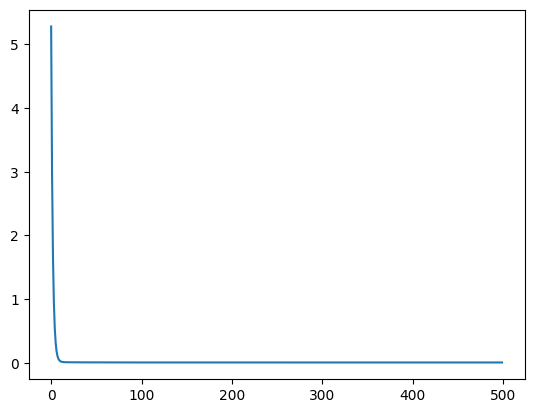

In [ ]:
#creating line plot
plt.plot(range(N), loss_hist)


In [ ]:
#testing model on test dataset
import torch.nn.functional as F
yp = model(x_test)

# Calculate the l1 los
l1_loss = F.l1_loss(yp.squeeze(), y_test)
print(l1_loss)

tensor(0.0736, grad_fn=<MeanBackward0>)
